# Apoptosis & Necrosis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('annexin.csv')

In [ ]:
df

In [ ]:
df_m1 = df[['sample1','Cell_type','Treatment', 'phenotype']].rename(columns = {'sample1':'%pos'})
df_m2 = df[['sample2','Cell_type','Treatment', 'phenotype']].rename(columns = {'sample2':'%pos'})
df_m3 = df[['sample3','Cell_type','Treatment', 'phenotype']].rename(columns = {'sample3':'%pos'})
df_m4 = df[['sample4','Cell_type','Treatment', 'phenotype']].rename(columns = {'sample4':'%pos'})

In [ ]:
df_m1.insert(4, 'sample', value = 'sample1')
df_m2.insert(4, 'sample', value = 'sample2')
df_m3.insert(4, 'sample', value = 'sample3')
df_m4.insert(4, 'sample', value = 'sample4')

In [ ]:
df = pd.concat([df_m1, df_m2, df_m3, df_m4], ignore_index= True) #critical: ignore_index=True

In [ ]:
df

In [ ]:
sns.catplot(kind = 'violin', x = "Treatment", y = '%pos',\
            data =df[df['phenotype'] == 'FITC+PI-Apoptosis'],\
            hue = 'Cell_type', \
            inner = 'points',
            order = ['DMSO', 'Rot', 'AA5', 'ANTI A', 'OLIGO', 'UK5099', 'BAY876', '2DG', 'GALLOFLAVIN', 'DCA'],\
            palette = ['#ED1C24', '#00AEEF'])

## Dropping outliers
- 2 samples to drop

In [ ]:
df.groupby('Treatment').count()

In [ ]:
# identify outliers
df[(df['Treatment'] == 'AA5') & (df['Cell_type'] == 'Basal') & (df['sample'] == 'sample4')]

In [ ]:
indices_1 = df[(df['Treatment'] == 'AA5') & (df['Cell_type'] == 'Basal') & (df['sample'] == 'sample4')].index

In [ ]:
df.at[indices_1,'%pos'] = np.NaN 

In [ ]:
# confirming changes
df[(df['Treatment'] == 'AA5') & (df['Cell_type'] == 'Basal') & (df['sample'] == 'sample4')]

- second sample

In [ ]:
df[(df['Treatment'] == 'DCA') & (df['Cell_type'] == 'Basal') & (df['sample'] == 'sample1')]

In [ ]:
indices_2 = df[(df['Treatment'] == 'DCA') & (df['Cell_type'] == 'Basal') & (df['sample'] == 'sample1')].index
df.at[indices_2,'%pos'] = np.NaN
df[(df['Treatment'] == 'DCA') & (df['Cell_type'] == 'Basal') & (df['sample'] == 'sample1')]

In [ ]:
# df.to_csv("annexin_final.csv", index = False)

## Data Visualization

In [7]:
df = pd.read_csv('annexin_final.csv')

In [ ]:
df.groupby('Treatment').count()

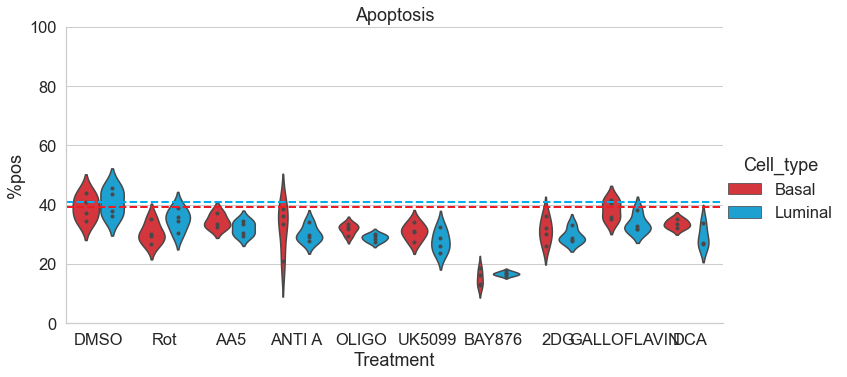

In [3]:
sns.set(style="whitegrid", font_scale= 1.5)

sns.catplot(kind = 'violin', x = "Treatment", y = '%pos',\
            data =df[df['phenotype'] == 'FITC+PI-Apoptosis'],\
            hue = 'Cell_type', \
            inner = 'points',
            order = ['DMSO', 'Rot', 'AA5', 'ANTI A', 'OLIGO', 'UK5099', 'BAY876', '2DG', 'GALLOFLAVIN', 'DCA'],\
            palette = ['#ED1C24', '#00AEEF'],\
            aspect = 2)\
.set(ylim=(0,100), title = "Apoptosis")


#horizontal line
dmso_b_mean_apop = np.mean(df[(df['Treatment']=='DMSO') & (df['Cell_type']=='Basal') & (df['phenotype']=='FITC+PI-Apoptosis')]['%pos'])
dmso_l_mean_apop = np.mean(df[(df['Treatment']=='DMSO') & (df['Cell_type']=='Luminal') & (df['phenotype']=='FITC+PI-Apoptosis')]['%pos'])

plt.axhline(y=dmso_b_mean_apop, c = '#ED1C24', linewidth=2, linestyle ="--") #"--"
plt.axhline(y=dmso_l_mean_apop, c = '#00AEEF', linewidth=2, linestyle ="--")

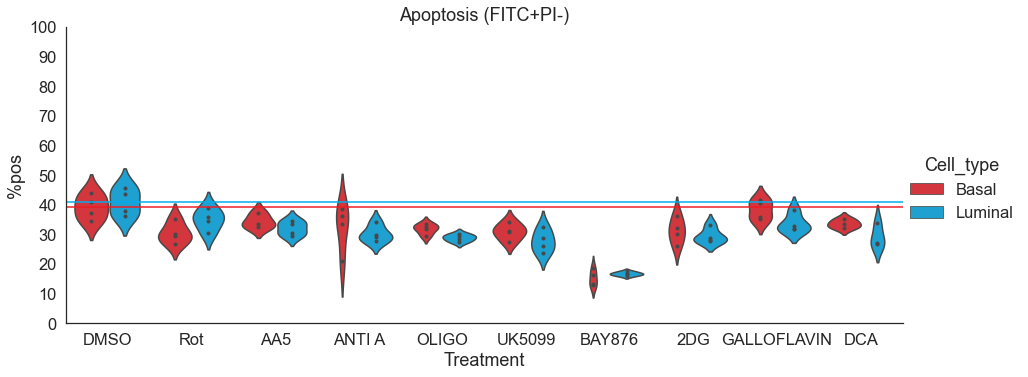

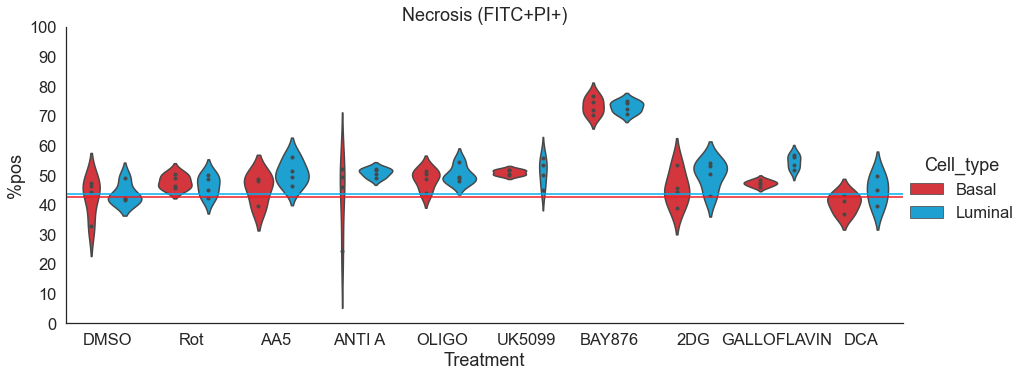

In [5]:
sns.set(style="white", font_scale= 1.5)

sns.catplot(kind = 'violin', x = "Treatment", y = '%pos',\
            data =df[df['phenotype'] == 'FITC+PI-Apoptosis'],\
            hue = 'Cell_type', \
            inner = 'points',
            order = ['DMSO', 'Rot', 'AA5', 'ANTI A', 'OLIGO', 'UK5099', 'BAY876', '2DG', 'GALLOFLAVIN', 'DCA'],\
            palette = ['#ED1C24', '#00AEEF'],\
            aspect = 2.5)\
.set(ylim=(0,100), title = "Apoptosis (FITC+PI-)", yticks = np.arange(0,110,10))


#horizontal line
dmso_b_mean_apop = np.mean(df[(df['Treatment']=='DMSO') & (df['Cell_type']=='Basal') & (df['phenotype']=='FITC+PI-Apoptosis')]['%pos'])
dmso_l_mean_apop = np.mean(df[(df['Treatment']=='DMSO') & (df['Cell_type']=='Luminal') & (df['phenotype']=='FITC+PI-Apoptosis')]['%pos'])

plt.axhline(y=dmso_b_mean_apop, c = '#ED1C24', linewidth=1.5) #"--"
plt.axhline(y=dmso_l_mean_apop, c = '#00AEEF', linewidth=1.5)
# Save as pdf
# plt.savefig('apoptosis.pdf')

sns.catplot(kind = 'violin', x = "Treatment", y = '%pos',\
            data =df[df['phenotype'] == 'FITC+PI+Necrosis'],\
            hue = 'Cell_type', \
            inner = 'points',
            order = ['DMSO', 'Rot', 'AA5', 'ANTI A', 'OLIGO', 'UK5099', 'BAY876', '2DG', 'GALLOFLAVIN', 'DCA'],\
            palette = ['#ED1C24', '#00AEEF'],\
            aspect = 2.5)\
.set(ylim=(0,100), title = "Necrosis (FITC+PI+)", yticks = np.arange(0,110,10))


#horizontal line
dmso_b_mean_necrosis = np.mean(df[(df['Treatment']=='DMSO') & (df['Cell_type']=='Basal') & (df['phenotype']=='FITC+PI+Necrosis')]['%pos'])
dmso_l_mean_necrosis = np.mean(df[(df['Treatment']=='DMSO') & (df['Cell_type']=='Luminal') & (df['phenotype']=='FITC+PI+Necrosis')]['%pos'])

plt.axhline(y=dmso_b_mean_necrosis, c = '#ED1C24', linewidth=1.5) #":", "--"
plt.axhline(y=dmso_l_mean_necrosis, c = '#00AEEF', linewidth=1.5)

# Save as pdf
# plt.savefig('necrosis.pdf')

In [ ]:
df[(df['Treatment']=='DMSO') & (df['Cell_type']=='Basal') & (df['phenotype']=='FITC+PI-Apoptosis')]['%pos'].describe()

## Statistical Testing

In [2]:
import pingouin as pg

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %pos       308 non-null    float64
 1   Cell_type  320 non-null    object 
 2   Treatment  320 non-null    object 
 3   phenotype  320 non-null    object 
 4   sample     320 non-null    object 
dtypes: float64(1), object(4)
memory usage: 12.6+ KB


In [23]:
df[df['phenotype'] == 'FITC+PI-Apoptosis']

,%pos,Cell_type,Treatment,phenotype,sample
0,32.2,Basal,2DG,FITC+PI-Apoptosis,sample1
1,37.1,Basal,AA5,FITC+PI-Apoptosis,sample1
2,38.5,Basal,ANTI A,FITC+PI-Apoptosis,sample1
3,18.6,Basal,BAY876,FITC+PI-Apoptosis,sample1
4,NaN,Basal,DCA,FITC+PI-Apoptosis,sample1
...,...,...,...,...,...
255,36.3,Luminal,DMSO,FITC+PI-Apoptosis,sample4
256,31.7,Luminal,GALLOFLAVIN,FITC+PI-Apoptosis,sample4
257,29.3,Luminal,OLIGO,FITC+PI-Apoptosis,sample4
258,30.3,Luminal,Rot,FITC+PI-Apoptosis,sample4


In [22]:
#anova2, unbalanced
pg.anova(dv="%pos", between = ["Cell_type", "Treatment"], data = df[df['phenotype'] == 'FITC+PI+Necrosis'])

TypeError: unhashable type: 'list'

In [ ]:
df[df['phenotype'] == 'FITC+PI-Apoptosis']